## Date 11/01/2025
## Task 1

## Movie Genre Classification 

In [2]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report


In [3]:
train_data = pd.read_csv("train_data.txt",sep=':::', names=['ID', 'TITLE', 'GENRE', 'DESCRIPTION'])
display(train_data.tail())
print(train_data.shape)


test_data = pd.read_csv("test_data.txt",sep=':::', names=['ID', 'TITLE', 'GENRE', 'DESCRIPTION'])
print(display(test_data.tail()))
print(test_data.shape)

test_solution_data = pd.read_csv("test_data_solution.txt",sep=':::', names=['ID', 'TITLE', 'GENRE', 'DESCRIPTION'])
print(display(test_solution_data.tail()))
print(test_solution_data.shape)

C:\Users\Rameshbhai patel\AppData\Local\Temp\ipykernel_13052\3521045561.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  train_data = pd.read_csv("train_data.txt",sep=':::', names=['ID', 'TITLE', 'GENRE', 'DESCRIPTION'])


,ID,TITLE,GENRE,DESCRIPTION
54209,54210,"""Bonino"" (1953)",comedy,This short-lived NBC live sitcom centered on ...
54210,54211,Dead Girls Don't Cry (????),horror,The NEXT Generation of EXPLOITATION. The sist...
54211,54212,Ronald Goedemondt: Ze bestaan echt (2008),documentary,"Ze bestaan echt, is a stand-up comedy about g..."
54212,54213,Make Your Own Bed (1944),comedy,Walter and Vivian live in the country and hav...
54213,54214,Nature's Fury: Storm of the Century (2006),history,"On Labor Day Weekend, 1935, the most intense ..."


(54214, 4)


C:\Users\Rameshbhai patel\AppData\Local\Temp\ipykernel_13052\3521045561.py:6: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  test_data = pd.read_csv("test_data.txt",sep=':::', names=['ID', 'TITLE', 'GENRE', 'DESCRIPTION'])


,ID,TITLE,GENRE,DESCRIPTION
54195,54196,"""Tales of Light & Dark"" (2013)","Covering multiple genres, Tales of Light & Da...",NaN
54196,54197,Der letzte Mohikaner (1965),As Alice and Cora Munro attempt to find their...,NaN
54197,54198,Oliver Twink (2007),A movie 169 years in the making. Oliver Twist...,NaN
54198,54199,Slipstream (1973),"Popular, but mysterious rock D.J Mike Mallard...",NaN
54199,54200,Curitiba Zero Grau (2010),"Curitiba is a city in movement, with rhythms ...",NaN


None
(54200, 4)


C:\Users\Rameshbhai patel\AppData\Local\Temp\ipykernel_13052\3521045561.py:10: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  test_solution_data = pd.read_csv("test_data_solution.txt",sep=':::', names=['ID', 'TITLE', 'GENRE', 'DESCRIPTION'])


,ID,TITLE,GENRE,DESCRIPTION
54195,54196,"""Tales of Light & Dark"" (2013)",horror,"Covering multiple genres, Tales of Light & Da..."
54196,54197,Der letzte Mohikaner (1965),western,As Alice and Cora Munro attempt to find their...
54197,54198,Oliver Twink (2007),adult,A movie 169 years in the making. Oliver Twist...
54198,54199,Slipstream (1973),drama,"Popular, but mysterious rock D.J Mike Mallard..."
54199,54200,Curitiba Zero Grau (2010),drama,"Curitiba is a city in movement, with rhythms ..."


None
(54200, 4)


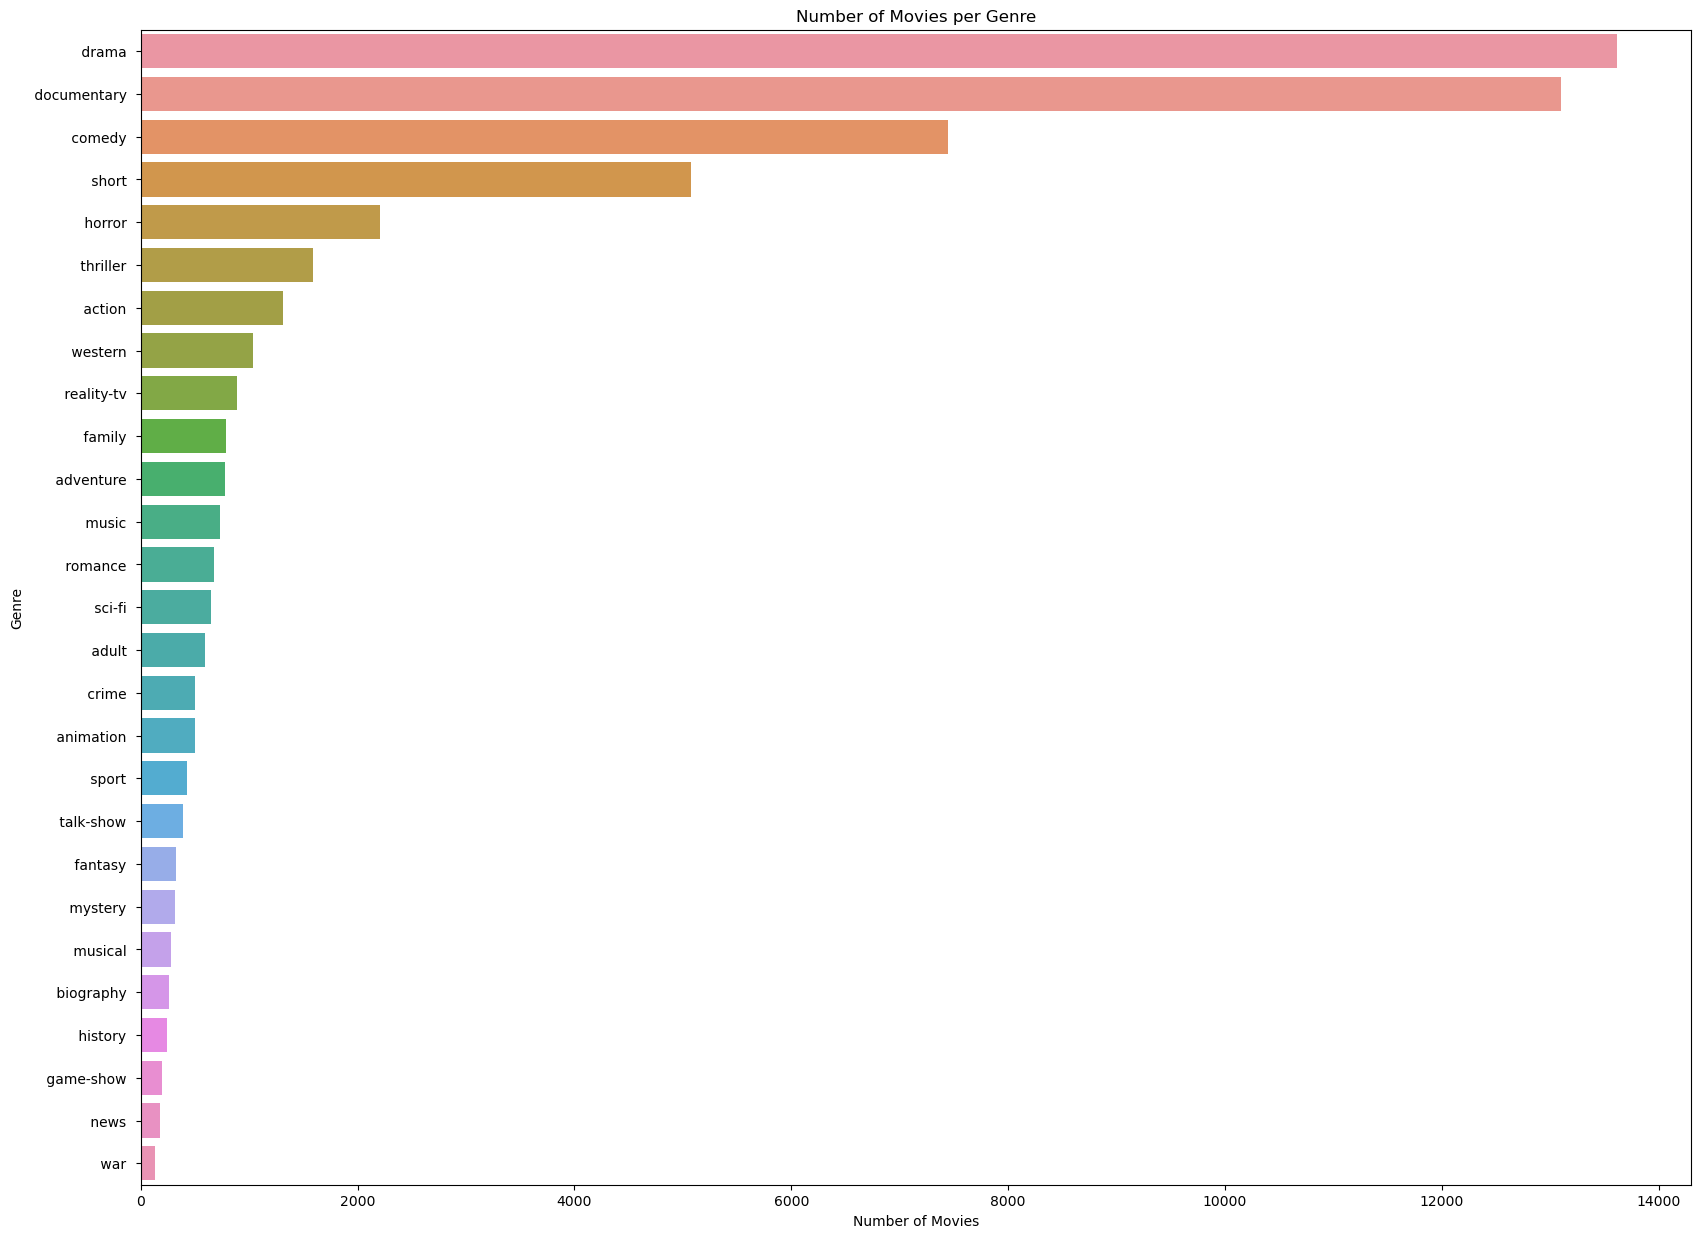

In [4]:
plt.figure(figsize=(20,15))
sns.countplot(y=train_data['GENRE'], order = train_data['GENRE'].value_counts().index)
plt.title('Number of Movies per Genre')
plt.xlabel('Number of Movies')
plt.ylabel('Genre')
plt.show()

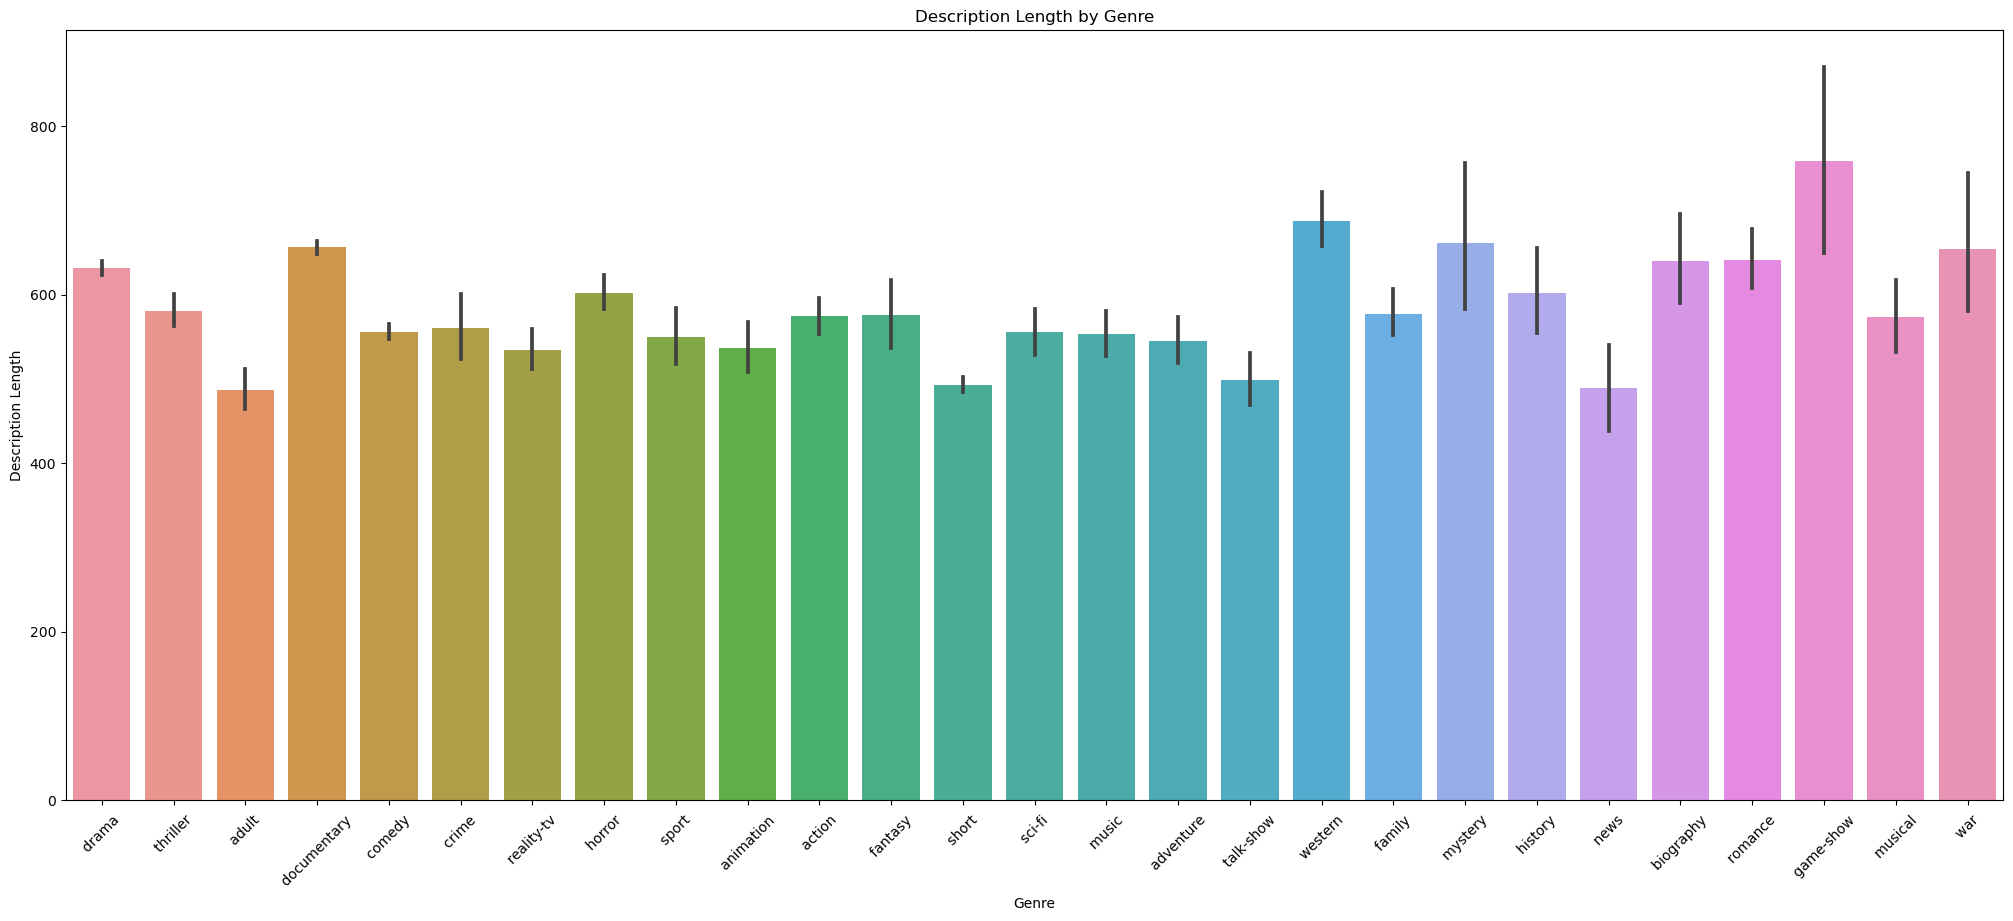

In [5]:
train_data['DESCRIPTION_length'] = train_data['DESCRIPTION'].apply(len)
plt.figure(figsize=(25, 10))
sns.barplot(x='GENRE', y='DESCRIPTION_length', data=train_data)
plt.title('Description Length by Genre')
plt.xticks(rotation=45)
plt.xlabel('Genre')
plt.ylabel('Description Length')
plt.show()

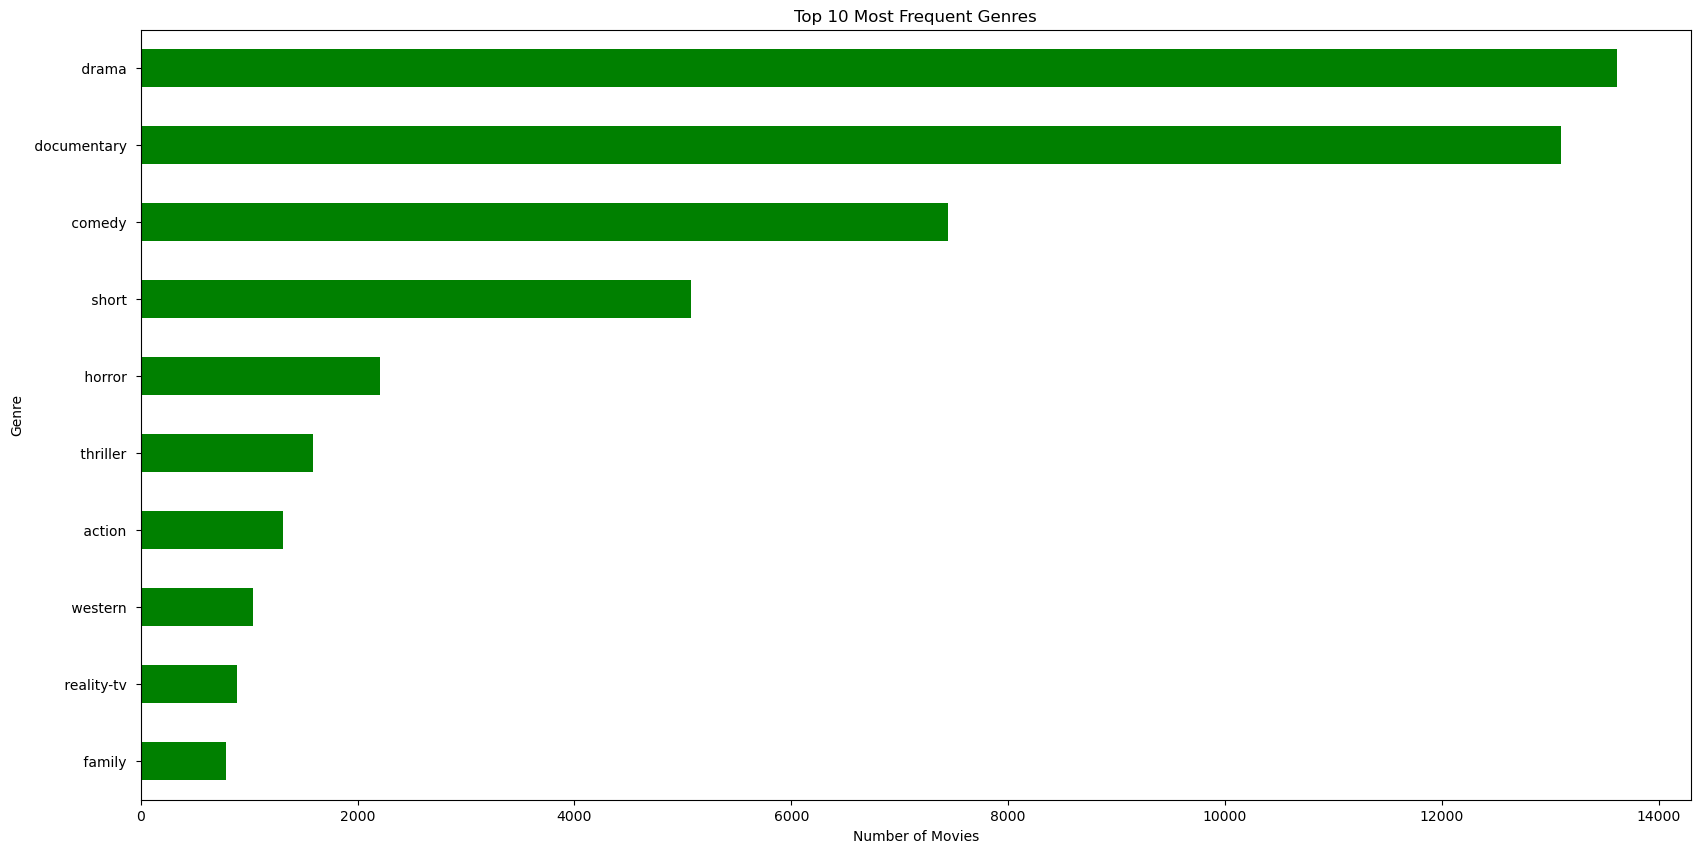

In [6]:
top_genres = train_data['GENRE'].value_counts().head(10)

plt.figure(figsize=(20, 10))
top_genres.plot(kind='barh', color='green')
plt.title('Top 10 Most Frequent Genres')
plt.xlabel('Number of Movies')
plt.ylabel('Genre')
plt.gca().invert_yaxis()  # Invert y-axis to have the genre with the most movies at the top
plt.show()

In [7]:
# Handle any potential missing values
train_data['DESCRIPTION'].fillna("", inplace=True)
test_data['DESCRIPTION'].fillna("", inplace=True)

t_v = TfidfVectorizer(stop_words='english', max_features=100000)
X_train = t_v.fit_transform(train_data['DESCRIPTION'])
X_test = t_v.transform(test_data['DESCRIPTION'])

label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(train_data['GENRE'])
y_test = label_encoder.transform(test_solution_data['GENRE'])

In [8]:
X_train_sub, X_val, y_train_sub, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

clf = LinearSVC()
clf.fit(X_train_sub, y_train_sub)

y_val_pred = clf.predict(X_val)
print("Validation Accuracy:", accuracy_score(y_val, y_val_pred))
print("Validation Classification Report:\n", classification_report(y_val, y_val_pred))

C:\Users\Rameshbhai patel\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Validation Accuracy: 0.5836945494789265
Validation Classification Report:
               precision    recall  f1-score   support

           0       0.44      0.32      0.37       263
           1       0.74      0.44      0.55       112
           2       0.45      0.21      0.28       139
           3       0.47      0.15      0.23       104
           4       0.00      0.00      0.00        61
           5       0.53      0.59      0.56      1443
           6       0.39      0.07      0.11       107
           7       0.69      0.81      0.75      2659
           8       0.56      0.72      0.63      2697
           9       0.36      0.17      0.23       150
          10       0.13      0.03      0.04        74
          11       0.82      0.68      0.74        40
          12       0.00      0.00      0.00        45
          13       0.65      0.66      0.66       431
          14       0.61      0.53      0.57       144
          15       0.25      0.04      0.07        50
      

In [9]:
y_pred = clf.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("Test Classification Report:\n", classification_report(y_test, y_pred))

Test Accuracy: 0.09357933579335793
Test Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00      1314
           1       0.00      0.00      0.00       590
           2       0.00      0.00      0.00       775
           3       0.00      0.00      0.00       498
           4       0.00      0.00      0.00       264
           5       0.00      0.00      0.00      7446
           6       0.00      0.00      0.00       505
           7       0.00      0.00      0.00     13096
           8       0.00      0.00      0.00     13612
           9       0.00      0.00      0.00       783
          10       0.00      0.00      0.00       322
          11       0.00      0.00      0.00       193
          12       0.00      0.00      0.00       243
          13       0.00      0.00      0.00      2204
          14       0.00      0.00      0.00       731
          15       0.00      0.00      0.00       276
          16     

C:\Users\Rameshbhai patel\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Rameshbhai patel\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Rameshbhai patel\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [10]:
from sklearn.naive_bayes import MultinomialNB
Mnb_classifier = MultinomialNB()
Mnb_classifier.fit(X_train, y_train)

MultinomialNB()

In [11]:
Mnb_classifier.predict(X_test)

array([8, 8, 8, ..., 8, 8, 8])

In [12]:
from sklearn.linear_model import LogisticRegression
lr_classifier = LogisticRegression(max_iter=500)
lr_classifier.fit(X_train, y_train)

LogisticRegression(max_iter=500)

In [13]:
lr_classifier.predict(X_test)

array([8, 8, 8, ..., 8, 8, 8])

## Now designing a function show that we can predict the genre of the movie

In [15]:
def predict_movie(description):
    t_v1 = t_v.transform([description])
    pred_label = clf.predict(t_v1)
    return label_encoder.inverse_transform(pred_label)[0]

sample_descr_for_movie = "A young wizard embarks on a quest to retrieve a magical artifact that can save his kingdom"
print(predict_movie(sample_descr_for_movie))

sample_descr_for_movie1 = "A journalist uncovers a government conspiracy and becomes the target of relentless assassins."
print(predict_movie(sample_descr_for_movie1))
sample_descr_for_movie1 = "A struggling artist finds redemption through an unlikely friendship with a terminally ill child"
print(predict_movie(sample_descr_for_movie1))

sample_descr_for_movie1 = "A detective investigates a series of cryptic murders connected by a single haunting symbol."
print(predict_movie(sample_descr_for_movie1))


 fantasy 
 action 
 drama 
 thriller 
